# 2.3 PageRank
## 2.3(a)

In [17]:
library('igraph')
library('Matrix')
library('pracma')

In [2]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [3]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

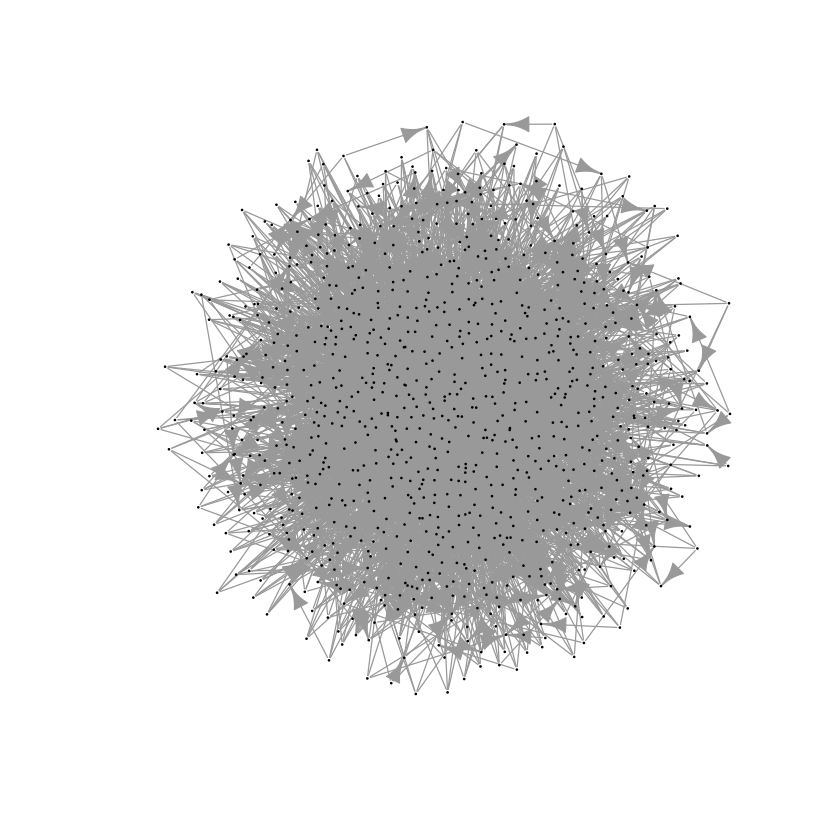

In [4]:
n <- 1000
g <- barabasi.game(n, m=4, directed=T)
plot(g,vertex.size=0.5, vertex.label.cex=0.001)
dia <- diameter(g)
deg <- degree(g,mode=c("in"))

In [5]:
#print (deg)

In [27]:
transition_matrix <- create_transition_matrix(g)
#print(transition_matrix)

In [7]:
p_init <- rep(1/n, n)
visits <- rep(0, n)
#visits[1] <- visits[1]+1
#print (visits)
#print (p_init)

In [8]:
for (i in 1:n){
    v_init = sample(1:vcount(g), 1, prob = p_init)    
    v_last = random_walk(g, dia*10, v_init, transition_matrix)
    #fprintf('%d\n', v_last)
    visits[v_last] <- visits[v_last]+1
}
#print (v)

In [9]:
visit_prob_a = visits/1000
print (visit_prob_a)

   [1] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0

[1] 0.4187072


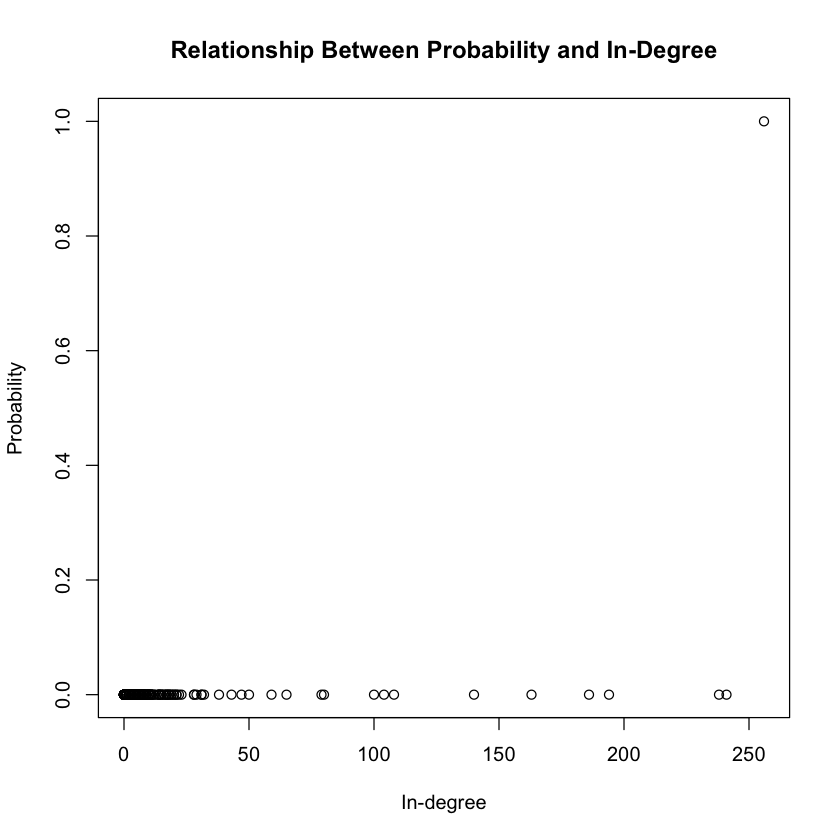

In [10]:
plot(deg,visit_prob_a,main="Relationship Between Probability and In-Degree",xlab="In-degree",ylab="Probability",type="p")
cor=cor(deg,visit_prob_a) # count the probability correlation
print(cor)

### The first node has the probability of 100%, and the other nodes have the probability of 0%.

## 2.3(b)

In [11]:
tele_prob = 0.15

In [12]:
random_walk_with_teleportation = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        teleport = sample(0:1, 1, prob = c(1-tele_prob, tele_prob))
        if (teleport == 0){
            PMF = transition_matrix[v, ]
            }
        else {
            PMF = p_init
        }
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [13]:
visits <- rep(0, n)
for (i in 1:10000){
    v_init = sample(1:vcount(g), 1, prob = p_init)    
    v_last = random_walk_with_teleportation(g, dia*10, v_init, transition_matrix)
    #fprintf('%d\n', v_last)
    visits[v_last] <- visits[v_last]+1
}

In [14]:
#print(sum(visits))
#print(visits)

In [15]:
visit_prob_b = visits/10000
print (visit_prob_b)

   [1] 0.5714 0.0375 0.0339 0.0207 0.0239 0.0003 0.0161 0.0087 0.0199 0.0017
  [11] 0.0045 0.0043 0.0056 0.0005 0.0066 0.0019 0.0058 0.0064 0.0017 0.0028
  [21] 0.0002 0.0029 0.0003 0.0021 0.0012 0.0007 0.0010 0.0010 0.0001 0.0007
  [31] 0.0013 0.0006 0.0011 0.0015 0.0016 0.0001 0.0007 0.0009 0.0002 0.0005
  [41] 0.0017 0.0005 0.0005 0.0012 0.0004 0.0005 0.0012 0.0008 0.0001 0.0004
  [51] 0.0002 0.0005 0.0013 0.0008 0.0003 0.0006 0.0006 0.0011 0.0002 0.0001
  [61] 0.0006 0.0004 0.0007 0.0001 0.0002 0.0004 0.0004 0.0004 0.0001 0.0004
  [71] 0.0004 0.0002 0.0014 0.0001 0.0002 0.0004 0.0007 0.0007 0.0006 0.0008
  [81] 0.0001 0.0006 0.0002 0.0001 0.0006 0.0014 0.0001 0.0005 0.0003 0.0000
  [91] 0.0001 0.0002 0.0003 0.0001 0.0006 0.0002 0.0007 0.0009 0.0010 0.0004
 [101] 0.0008 0.0003 0.0001 0.0007 0.0001 0.0004 0.0007 0.0003 0.0004 0.0003
 [111] 0.0004 0.0004 0.0008 0.0002 0.0001 0.0009 0.0003 0.0003 0.0002 0.0004
 [121] 0.0001 0.0000 0.0003 0.0004 0.0000 0.0002 0.0015 0.0006 0.0005 0.0003

[1] 0.5086759


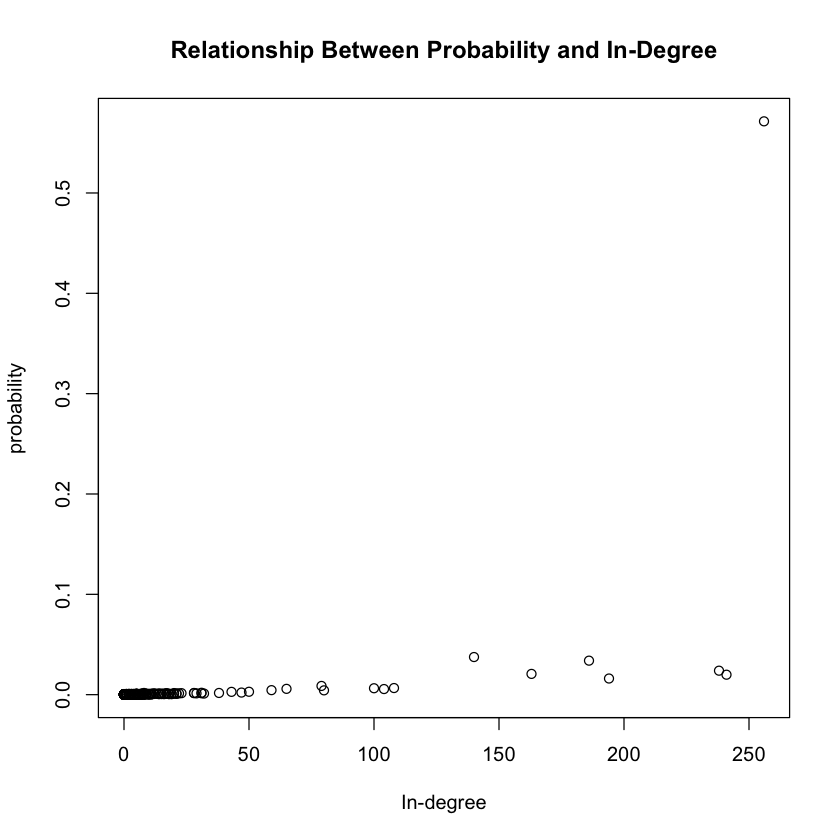

In [16]:
plot(deg,visit_prob_b,main="Relationship Between Probability and In-Degree",xlab="In-degree",ylab="probability",type="p")
cor=cor(deg,visit_prob_b) # count the probability correlation
print(cor)

# 2.4 Personalized PageRank
## 2.4(a)

In [24]:
pr <- visit_prob_a
#print (pr)

In [44]:
#print (transition_matrix)

In [29]:
transition_matrix <- transition_matrix*(1-tele_prob) + pr*tele_prob
#print (transition_matrix)

1000 x 1000 sparse Matrix of class "dgCMatrix"
                                                                               
   [1,] 1.0000000 0.1500000 0.1500000 0.1500 0.1500 0.1500 0.1500 0.1500 0.1500
   [2,] 0.8500000 .         .         .      .      .      .      .      .     
   [3,] 0.4250000 0.4250000 .         .      .      .      .      .      .     
   [4,] 0.2833333 0.2833333 0.2833333 .      .      .      .      .      .     
   [5,] 0.2125000 0.2125000 0.2125000 0.2125 .      .      .      .      .     
   [6,] 0.2125000 0.2125000 0.2125000 0.2125 .      .      .      .      .     
   [7,] 0.2125000 .         0.2125000 0.2125 0.2125 .      .      .      .     
   [8,] 0.2125000 0.2125000 .         0.2125 0.2125 .      .      .      .     
   [9,] 0.2125000 .         0.2125000 .      .      .      0.2125 0.2125 .     
  [10,] 0.2125000 .         0.2125000 .      .      .      0.2125 0.2125 .     
  [11,] 0.2125000 0.2125000 0.2125000 .      .      .      .      .      

In [32]:
visits <- rep(0, n)
for (i in 1:10000){
    v_init = sample(1:vcount(g), 1, prob = p_init)    
    v_last = random_walk(g, dia*10, v_init, transition_matrix)
    #fprintf('%d\n', v_last)
    visits[v_last] <- visits[v_last]+1
}

In [33]:
visit_prob_4a = visits/10000
print (visit_prob_4a)

   [1] 0.2201 0.0888 0.0741 0.0467 0.0477 0.0008 0.0317 0.0187 0.0369 0.0038
  [11] 0.0100 0.0080 0.0110 0.0008 0.0100 0.0038 0.0077 0.0092 0.0025 0.0034
  [21] 0.0000 0.0046 0.0003 0.0032 0.0022 0.0007 0.0023 0.0023 0.0002 0.0011
  [31] 0.0025 0.0008 0.0015 0.0025 0.0026 0.0006 0.0008 0.0003 0.0006 0.0015
  [41] 0.0024 0.0009 0.0014 0.0009 0.0010 0.0008 0.0018 0.0015 0.0001 0.0005
  [51] 0.0003 0.0016 0.0023 0.0017 0.0005 0.0008 0.0005 0.0025 0.0000 0.0001
  [61] 0.0022 0.0012 0.0021 0.0001 0.0002 0.0007 0.0009 0.0010 0.0001 0.0008
  [71] 0.0007 0.0000 0.0028 0.0004 0.0001 0.0007 0.0015 0.0016 0.0003 0.0010
  [81] 0.0001 0.0004 0.0004 0.0002 0.0005 0.0013 0.0002 0.0014 0.0006 0.0000
  [91] 0.0002 0.0010 0.0011 0.0007 0.0004 0.0003 0.0007 0.0018 0.0005 0.0006
 [101] 0.0016 0.0002 0.0004 0.0011 0.0002 0.0004 0.0008 0.0006 0.0013 0.0011
 [111] 0.0002 0.0001 0.0009 0.0004 0.0007 0.0008 0.0003 0.0013 0.0003 0.0004
 [121] 0.0003 0.0002 0.0003 0.0003 0.0002 0.0003 0.0019 0.0006 0.0010 0.0013

[1] 0.7690498


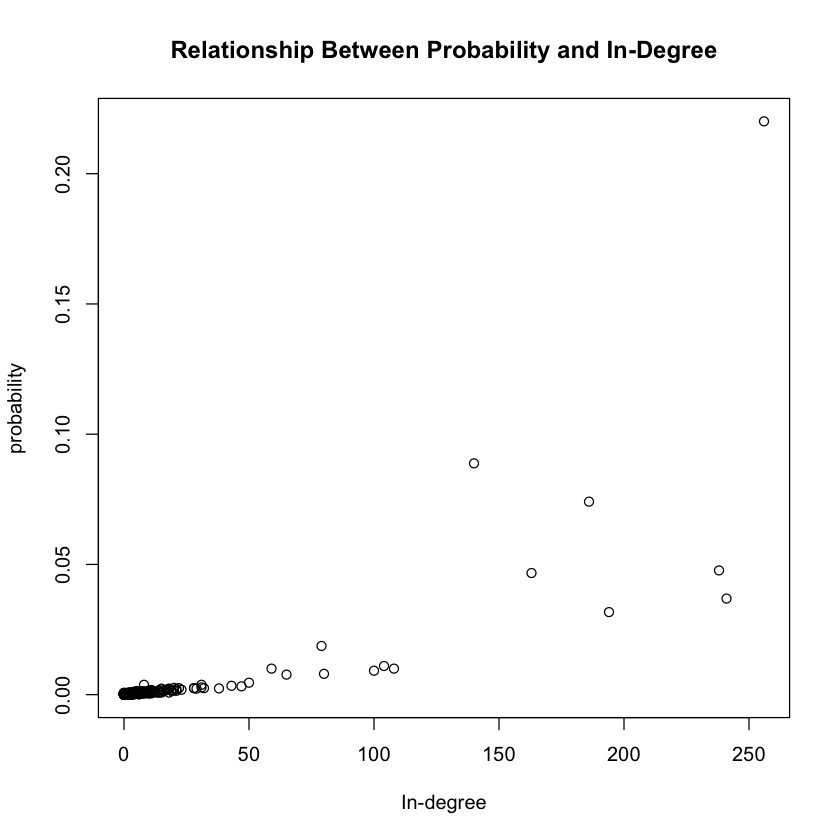

In [34]:
plot(deg,visit_prob_4a,main="Relationship Between Probability and In-Degree",xlab="In-degree",ylab="probability",type="p")
cor=cor(deg,visit_prob_4a) # count the probability correlation
print(cor)

## 2.4(b)

In [45]:
transition_matrix <- create_transition_matrix(g)

In [46]:
which.median = function(x) {
  if (length(x) %% 2 != 0) {
    which(x == median(x))
  } else if (length(x) %% 2 == 0) {
    a = sort(x)[c(length(x)/2, length(x)/2+1)]
    c(which(x == a[1]), which(x == a[2]))
  }
}

In [48]:
m <- which.median(pr)
two_nodes <- sample(m, 2) 
print (two_nodes)

[1] 429 484


In [49]:
random_walk_with_teleportation_two_nodes = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        teleport = sample(0:1, 1, prob = c(1-tele_prob, tele_prob))
        if (teleport == 0){
            PMF = transition_matrix[v, ]
            v = sample(1:vcount(g), 1, prob = PMF)  
            }
        else {
            v = sample(two_nodes, 1, prob = c(0.5,0.5))  
        }       
    }
    
    return(v)
}

In [50]:
visits <- rep(0, n)
for (i in 1:10000){
    v_init = sample(1:vcount(g), 1, prob = p_init)    
    v_last = random_walk_with_teleportation_two_nodes(g, dia*10, v_init, transition_matrix)
    #fprintf('%d\n', v_last)
    visits[v_last] <- visits[v_last]+1
}

In [51]:
visit_prob_4b = visits/10000
print (visit_prob_4b)

   [1] 0.5757 0.0413 0.0619 0.0150 0.0187 0.0000 0.0216 0.0021 0.0073 0.0002
  [11] 0.0015 0.0327 0.0000 0.0000 0.0000 0.0002 0.0153 0.0011 0.0000 0.0000
  [21] 0.0000 0.0000 0.0000 0.0070 0.0000 0.0000 0.0002 0.0000 0.0000 0.0000
  [31] 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0002 0.0000 0.0000 0.0000
  [41] 0.0000 0.0002 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
  [51] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
  [61] 0.0000 0.0037 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
  [71] 0.0000 0.0000 0.0009 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
  [81] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
  [91] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [101] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [111] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [121] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0008 0.0000 0.0000 0.0000

[1] 0.5004164


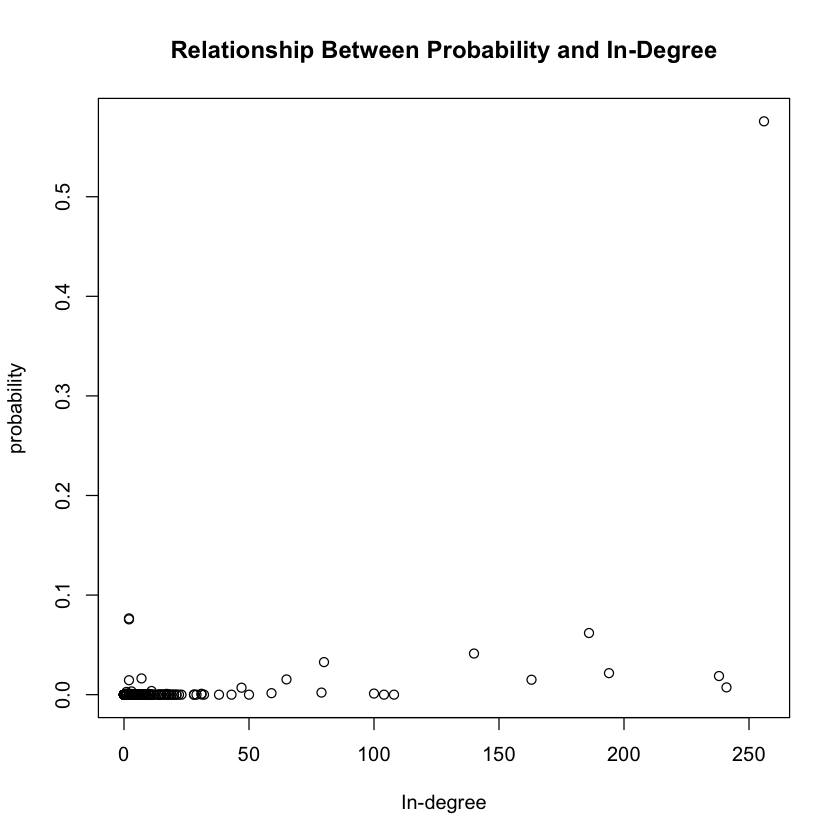

In [52]:
plot(deg,visit_prob_4b,main="Relationship Between Probability and In-Degree",xlab="In-degree",ylab="probability",type="p")
cor=cor(deg,visit_prob_4b) # count the probability correlation
print(cor)

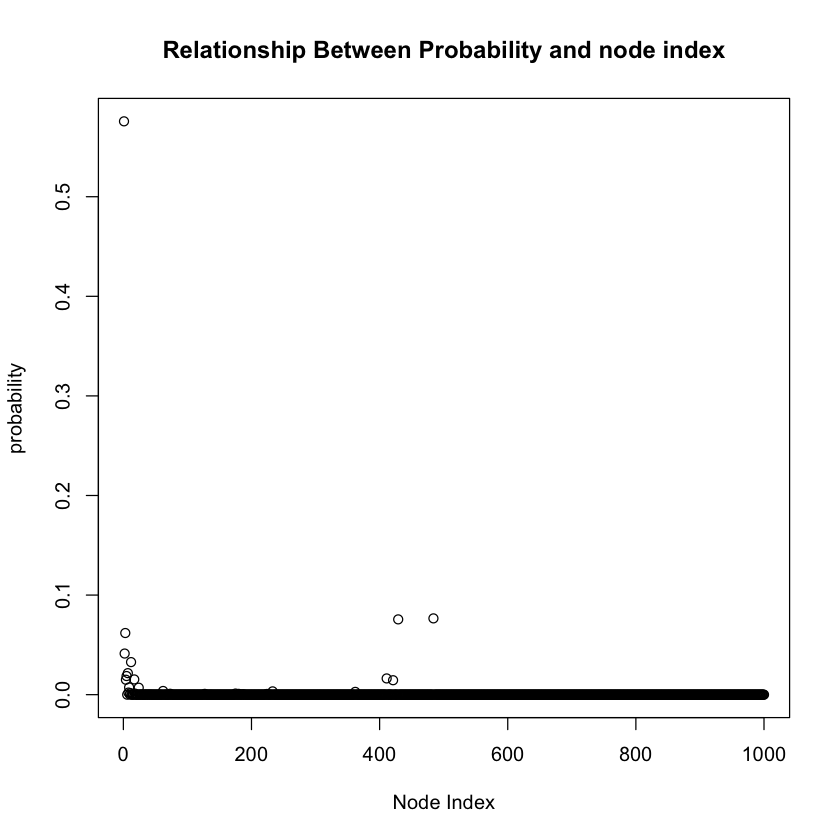

In [54]:
plot(seq(1:n),visit_prob_4b,main="Relationship Between Probability and node index",xlab="Node Index",ylab="probability",type="p")